<div class="titre-notebook" style="font-size:36px; text-align:center; font-weight:bold; background-color:#f1f1f1; padding:0.01em 16px; margin: 16px auto;">
CN4 - Filtrage linéaire d'un signal
</div>

Pour traiter les données et les représenter, nous utiliserons les modules `numpy` et `matplotlib.pyplot`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nombres complexes en python

En python, tout nombre complexe est représenté par 2 flottants (parties réelle et imaginaire) qui constitue un nouveau type de valeur: le type `complex`.

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)" halign="flush center">

**Le nombre imaginaire $j$ tel que $j^2 = -1$ s'écrit en python `1j`.**
</div>

In [2]:
z = 3 + 4*1j
print(abs(z)) # Module
print(np.angle(z)) # Argument en radians
print(np.angle(z, deg=True)) # Argument en degrès
print(z + 1 - 2*1j)

5.0
0.9272952180016122
53.13010235415598
(4+2j)


<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 1
Calculer le module, l'argument et la partie réelle du nombre complexe $\underline{Z}= \dfrac{(1+2j)^2}{1 - 4j}$.
</div>

In [3]:
# Votre code pour l'exercice 1


# Rappels théoriques

## Fonction de transfert harmonique
Lorqu'un signal sinusoïdal de pulsation $\omega$ est envoyé dans un filtre linéaire de fonction de transfert harmonique $\underline{H}$, le signal de sortie est aussi sinusïdal **de même pulsation $\omega$ mais d'amplitude et de phase différentes**:

- Signaux complexes:
$$Ee^{j(\omega t+\varphi)} \rightarrow \boxed{\text{filtre linéaire}} \rightarrow \underline{H}(j\omega) \times Ee^{j(\omega t+\varphi)}$$
- Signaux réels:
$$ E\cos(\omega t + \varphi) \rightarrow \boxed{\text{filtre linéaire}} \rightarrow E\left|\underline{H}(j\omega)\right|\cos\left[\omega t + \varphi + \text{arg}(\underline{H}(j\omega)\right]$$

## Décomposition de Fourier d'un signal périodique

Tout signal $e(t)$ **périodique** de fréquence $f_e$ peut être décomposé en une **somme de signaux sinusoïdaux de fréquences multiples de $f_e$**:
$$e(t) = E_0 + \sum_{n=1}^\infty E_n \cos\left(2\pi nf_e t + \varphi_n \right)$$

-   $E_0$ est la **composante continue**, qui correspond à la valeur moyenne du signal: $E_0 = \langle e \rangle$
-   la composante sinusoïdale $E_1 \cos\left(2\pi f_e t + \varphi_1 \right)$, qui a la **même fréquence que le signal** $e(t)$, est appelée **fondamental**
-   la composante sinusoïdale $E_n \cos\left(2\pi n f_e t + \varphi_n \right)$, qui a une **fréquence $n$ fois plus grande** que celle du signal $e(t)$, est appelée **harmonique $n$**.

## Principe de superposition

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

Pour un signal périodique (de fréquence $f$) envoyé dans un filtre linéaire, le signal de sortie est la superposition des réponses du filtre à chaque terme du développemen en série de Fourier de l’entrée (composante continue $n=0$, fondamental $n=1$ et harmoniques $n>1$).
$$\sum_{n=0}^{+\infty} E_n\cos(n\times 2\pi f t + \varphi_n)  \rightarrow \boxed{\text{filtre}} \rightarrow \sum_{n=0}^{+\infty} E_n\left|\underline{H}(j n\times 2\pi f)\right|\cos\left[n\times 2\pi f t + \varphi_n + \text{arg}(\underline{H}(jn\times 2\pi f))\right]$$
**Le ﬁltre réagit différemment à chaque harmonique $n$ car $\underline{H}$ dépend de la fréquence!**
</div>

# Filtrage d'un signal créneau

## Signal d'entrée

On considère une tension créneau $e$ de fréquence $f_e$, de valeur moyenne $E_0$ et d'amplitude $A$. On admet que son spectre ne contient que des harmoniques $n$ impaires et on pose $n=2k+1$ avec $k\in\mathbb{N}$:
$$ e(t) = E_0 + \sum_{k=0}^{+\infty} \frac{4A}{(2k+1)\pi}\sin\left[(2k+1)2\pi f_e t\right]$$
On se limite aux harmoniques inférieures à $N_\text{max}$, écrites sous forme de cosinus:
$$ e(t) \simeq E_0 + \sum_{k=0}^{N_\text{max}} \frac{4A}{(2k+1)\pi}\cos\left[(2k+1)2\pi f_e t - \frac{\pi}{2} \right]$$

In [4]:
E0 = 1 # Valeur moyenne (en Volt)
A = 1 # Amplitude du signal créneau (en Volt)
fe = 1e3 # fréquence du signal créneau (en Hz)
Nmax = 1000

Les amplitudes et phases des harmoniques sont représentés par des tableaux `numpy`

In [5]:
Ampli_e = np.array([ 4*A/((2*k+1)*np.pi) for k in range(Nmax) ])
Phase_e = np.array([ -np.pi/2 for k in range(Nmax) ])

Pour vérifier la pertinence de l'approximation aux harmoniques inférieures à `Nmax`, on trace le chronogramme du signal d'entrée sur une durée de `nbre_periodes` périodes en utilisant `nbre_points` de points.

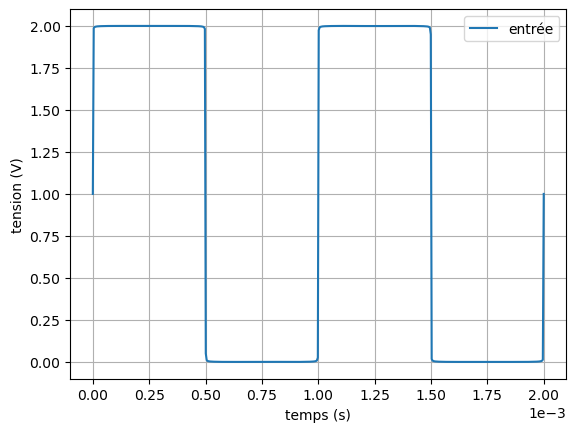

In [6]:
nbre_periodes = 2
nbre_points = 500
t = np.linspace(0, nbre_periodes/fe, nbre_points) # tableau des abcisses

# Reconstruction du signal d'entrée à partir de ses harmoniques
e = np.zeros(nbre_points) # Signal nul
for i in range(nbre_points) :
    e[i] = e[i] + E0 # ajout de la valeur moyenne à l'instant t[i]
    for k in range(Nmax) :
        # ajout de l'harmonique k à l'instant t[i]
        e[i] = e[i] + Ampli_e[k]*np.cos((2*k+1)*2*np.pi*fe*t[i] + Phase_e[k])

# Chronogramme
plt.figure()
plt.xlabel('temps (s)')
plt.ylabel('tension (V)')
plt.ticklabel_format(axis="x",scilimits=(-1,1)) # écriture scientifique des graduations
plt.plot(t,e,label='entrée')
plt.legend()
plt.grid()
plt.show()

## Fonction de transfert du filtre

On considère un filtre passe-bas d'ordre 1, de fonction de transfert:
$$\underline{H}(j\omega)=\frac{1}{1+j\omega/\omega_c} = \dfrac{1}{1 + j f/f_c}$$
avec $f_c$ sa fréquence de coupure

In [7]:
def H(f,fc) :
    return 1/(1 + 1j*f/fc)

## Signal de sortie

On détermine l signal de sortie pour différentes valeurs de la fréquence de coupure $f_c$ du filtre passe-bas d'ordre 1, valeurs regroupées dans la liste `liste_fc`.

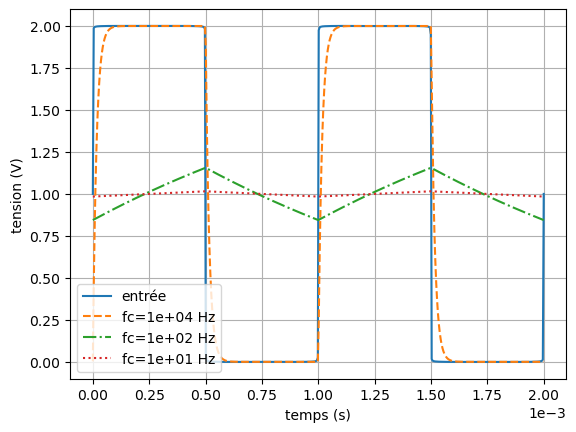

In [8]:
liste_fc = [ 1e4 , 1e2 , 1e1 ]
styles = iter(['dashed' , "dashdot", 'dotted']) # réglage graphique inutile pour vous

plt.figure()
plt.xlabel('temps (s)')
plt.ylabel('tension (V)')
plt.ticklabel_format(axis="x",scilimits=(-1,1)) # écriture scientifique des graduations
plt.grid()
plt.plot(t,e,label='entrée')

for fc in liste_fc :
    
    # Calcul du spectre du signal de sortie
    moy_s = E0 * np.abs(H(0, fc))
    Ampli_s = np.array([ Ampli_e[k] * np.abs(H((2*k+1)*fe, fc)) for k in range(Nmax) ])
    Phase_s = np.array([ Phase_e[k] + np.angle(H((2*k+1)*fe, fc)) for k in range(Nmax) ])
    
    # Construction du signal de sortie à partir de son spectre
    s = np.zeros(nbre_points)
    for i in range(nbre_points) :
        s[i] = s[i] + moy_s
        for k in range(Nmax) :
            s[i] = s[i] + Ampli_s[k]*np.cos((2*k+1)*2*np.pi*fe*t[i] + Phase_s[k])
    
    # Tracé du chronogramme du signal de sortie
    plt.plot(t,s,label='fc={:.0e} Hz'.format(fc), linestyle=next(styles))

plt.legend()
plt.show()

#### Influence de la fréquence de coupure:

- Pour $f_c \gg f_e$: le signal est peu déformé car seules les harmoniques de très hautes fréquences sont éliminées, ce qui adoucit les variations brusques.
- Pour $f_c < f_e$: tout le spectre de la tension d’entrée est située dans la zone intégratrice à -20 dB/décade. Le signal est intégré et la sortie est donc une tension triangulaire.
- Pour $f_c \ll f_e$: toutes les harmoniques sont éliminer, il ne reste que la valeur moyenne.

# A vous de jouer!

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 2
En reprenant le même signal d'entrée créneau de fréquence $f_e$ que précédemment, déterminer et interpréter les formes des signaux de sortie dans un filtre passe-haut d'ordre 1 de fonction de transfert
$$\underline{H}_1 = \dfrac{j f}{f_c + jf}$$
pour les cas $f_c \gg f_e$, $f_c > f_e$ et $f_c \ll f_e$.
</div>

In [9]:
# Votre code pour l'exercice 2


<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 3 (bonus)
On considère un signal d'entrée triangulaire de fréquence $f_e$, d'amplutude $A$ et de valeur moyenne $E'_0$. Sa décomposition en série de Fourier est:
$$ e'(t) = E'_0 + \sum_{k=0}^{+\infty} (-1)^k \frac{8A}{(2k+1)^2\pi^2}\sin\left[(2k+1)2\pi f_e t \right]$$
Déterminer et interpréter les formes des signaux de sortie dans un filtre passe-bande d'ordre 2 de fonction de transfert
$$\underline{H}_2 = \dfrac{1}{1+jQ\left(\dfrac{\omega}{\omega_0}-\dfrac{\omega_0}{\omega}\right)}$$
selon les valeurs de $f_0=\omega_0/2\pi$ et $Q$.
</div>

In [10]:
# Votre code pour l'exercice 3
